<h1>Mask Detection using Tensorflow, Keras and OpenCV</h1>

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.preprocessing import image

Using TensorFlow backend.


<h3>Considering Examples from Dataset</h3>

In [3]:
wm = cv2.imread(r'C:\Users\purva\Downloads\mask_detection\dataset\train\with_masks/1.jpg')
wm = cv2.cvtColor(wm,cv2.COLOR_BGR2RGB)

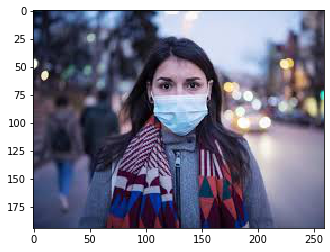

In [4]:
plt.imshow(wm)

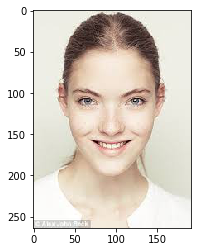

In [5]:
wm1 = cv2.imread(r'C:\Users\purva\Downloads\mask_detection\dataset\train\without_masks/1.jpg')
wm1 = cv2.cvtColor(wm1,cv2.COLOR_BGR2RGB)
plt.imshow(wm1)

In [6]:
wm1.shape

(264, 191, 3)

In [7]:
wm.shape

(194, 259, 3)

In [8]:
wm.max()

255

<h3>Creating function for dataset</h3>

In [9]:
img_gen = ImageDataGenerator(rotation_range = 30,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             rescale=1/255,
                             shear_range=0.2,
                             zoom_range=0.2,
                              horizontal_flip=True,
                             fill_mode='nearest')

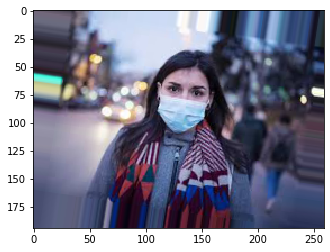

In [10]:
#For example 
plt.imshow(img_gen.random_transform(wm))

In [11]:
#applied to all images of traing set
img_gen.flow_from_directory(r'C:\Users\purva\Downloads\mask_detection\dataset\train')

Found 8 images belonging to 2 classes.


In [12]:
#setting the parameter for image shape 
input_shape=(150,150,3)

<h3><b>CNN Model</b></h3>

In [13]:
model = Sequential()  

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [15]:
batch_size = 16
train_image_gen = img_gen.flow_from_directory(r'C:\Users\purva\Downloads\mask_detection\dataset\train',
                                             target_size = input_shape[:2],
                                             batch_size = batch_size,
                                             class_mode = 'binary')

Found 8 images belonging to 2 classes.


In [16]:
test_image_gen = img_gen.flow_from_directory(r'C:\Users\purva\Downloads\mask_detection\dataset\test',
                                             target_size = input_shape[:2],
                                             batch_size = batch_size,
                                             class_mode = 'binary')

Found 8 images belonging to 2 classes.


In [17]:
train_image_gen.class_indices

{'with_masks': 0, 'without_masks': 1}

In [18]:
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                    validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
150/150 [==============================] - 56s 371ms/step - loss: 0.0877 - accuracy: 0.9558 - val_loss: 2.2025 - val_accuracy: 0.5417


<h3>Loading the HaarCascade model for frontface detection </h3>

In [30]:
hmodel = load_model(r'C:\Users\purva\Downloads\mask_detection\model-017.model')
face_clsfr = cv2.CascadeClassifier(r'C:\Users\purva\Downloads\mask_detection\haarcascade_frontalface_default.xml')

source = cv2.VideoCapture(0)
labels_dict = {0:'YOU ARE GOOD TO GO',1:'PLEASE WEAR YOUR MASK'}
color_dict = {0:(0,255,0),1:(0,0,255)}

In [ ]:
#for video capture
while True:
    ret,img = source.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)
    
    for x,y,w,h in faces:
        face_img = gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized= resized/255.0
        reshaped = np.reshape(normalized,(1,100,100,1))
        result = hmodel.predict(reshaped)
        
        label = np.argmax(result,axis=1)[0]
        
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img,labels_dict[label],(x,y-10),cv2.FONT_HERSHEY_SIMPLEX,0.0,(255,255,255),2)
    
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1) 
    if (key == 27):
        break
        
cv2.destroyAllWindows()
source.release()
        
        
         